In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import warnings
import os
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

In [88]:
df = pd.read_csv('data.csv')
df = df.dropna()

In [89]:
print(df.head())

   Season     Competition     Matchday      Date Venue               Club  \
1   02/03   Liga Portugal            6  10-07-02     H        Sporting CP   
10  03/04          FA Cup        Final   5/22/04     H  Manchester United   
14  04/05  Premier League           25  02-01-05     A  Manchester United   
15  04/05  Premier League           25  02-01-05     A  Manchester United   
19  04/05          FA Cup  Semi-Finals   4/17/05     A  Manchester United   

            Opponent Result Playing_Position Minute At_score  \
1      Moreirense FC   3:00               LW   90+5     3:00   
10       Millwall FC   3:00               RW     44     1:00   
14        Arsenal FC   2:04               RW     54     2:02   
15        Arsenal FC   2:04               RW     58     2:03   
19  Newcastle United   1:04               RW     76     1:04   

                 Type          Goal_assist  
1              Header            Rui Jorge  
10             Header         Gary Neville  
14   Left-footed 

In [90]:
print(df.isnull().sum())

Season              0
Competition         0
Matchday            0
Date                0
Venue               0
Club                0
Opponent            0
Result              0
Playing_Position    0
Minute              0
At_score            0
Type                0
Goal_assist         0
dtype: int64


In [91]:
goals_per_season = df.groupby('Season').size().reset_index(name='Goals')

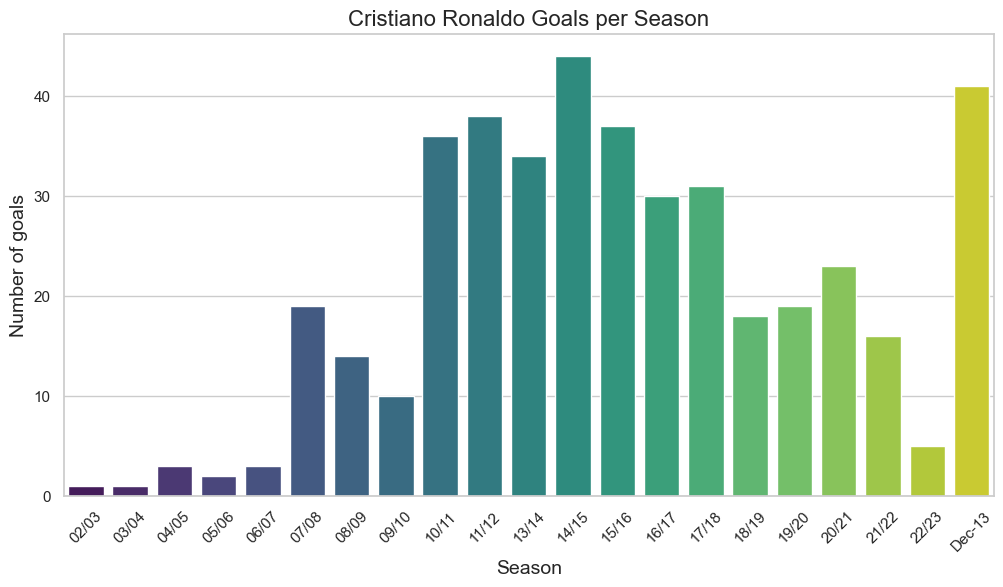

In [92]:
plt.figure(figsize=(12,6))
sns.set(style="whitegrid")

sns.barplot(x='Season',y='Goals',data=goals_per_season,palette='viridis')

plt.title('Cristiano Ronaldo Goals per Season',fontsize=16)
plt.xlabel('Season',fontsize=14)
plt.ylabel('Number of goals',fontsize=14)
plt.xticks(rotation=45)
plt.show()

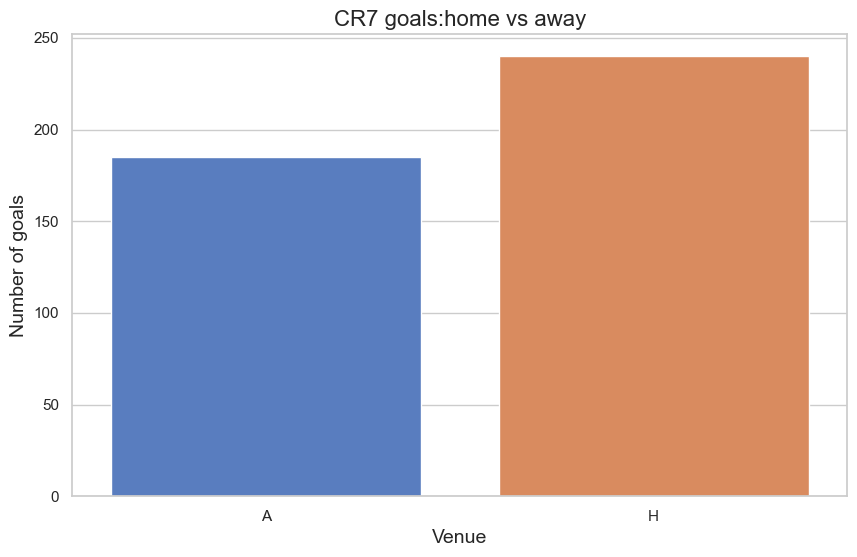

In [93]:
goals_per_venue = df.groupby('Venue').size().reset_index(name='Goals')

plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.barplot(x='Venue',y='Goals',data=goals_per_venue,palette='muted')

plt.title('CR7 goals:home vs away',fontsize=16)
plt.xlabel('Venue',fontsize=14)
plt.ylabel('Number of goals',fontsize=14)
plt.show()

In [94]:
fig=px.histogram(
    df,
    x='Opponent',
    title="Goal vs opponents",
    log_x=False,
    log_y=False,
    height=500,
    color='Club',
    hover_data=['Competition','Club']
)
fig.show()

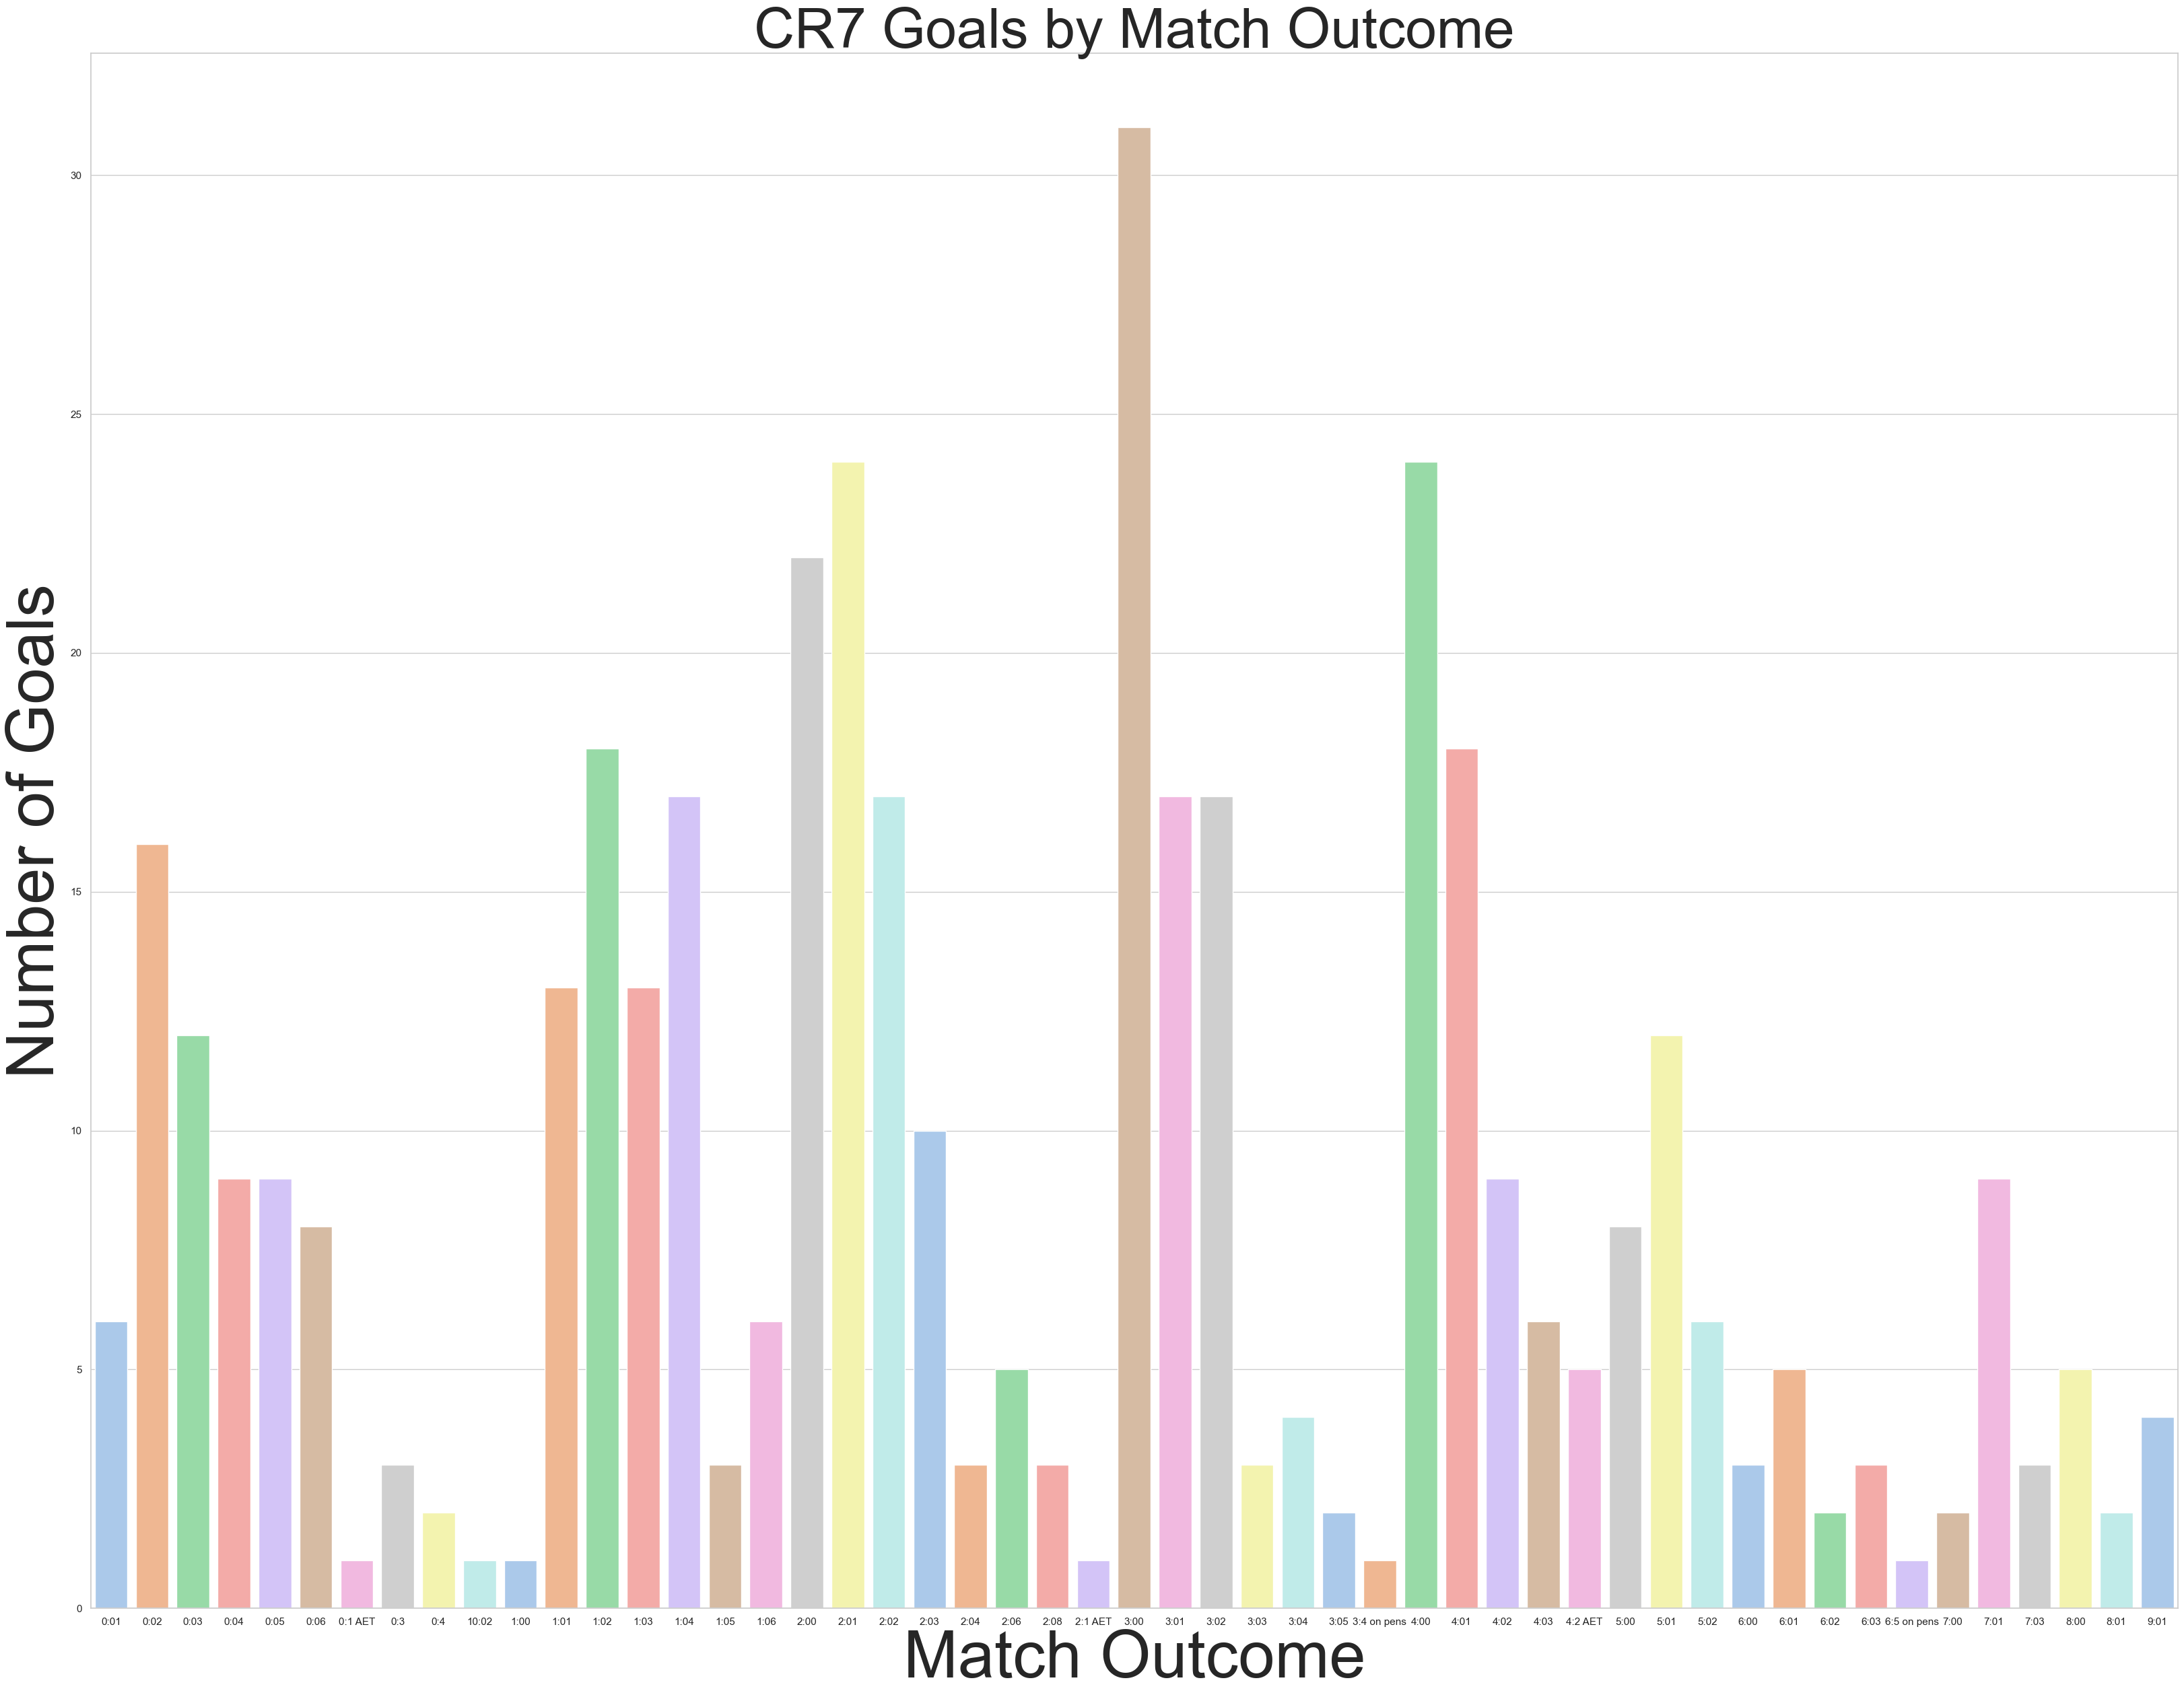

In [95]:
goals_per_result = df.groupby('Result').size().reset_index(name='Goals')

plt.figure(figsize=(40,30))
sns.set(style="whitegrid")

sns.barplot(x='Result',y='Goals',data=goals_per_result,palette='pastel')

plt.title('CR7 Goals by Match Outcome',fontsize=60)
plt.xlabel('Match Outcome',fontsize=70)
plt.ylabel('Number of Goals',fontsize=70)
plt.show()


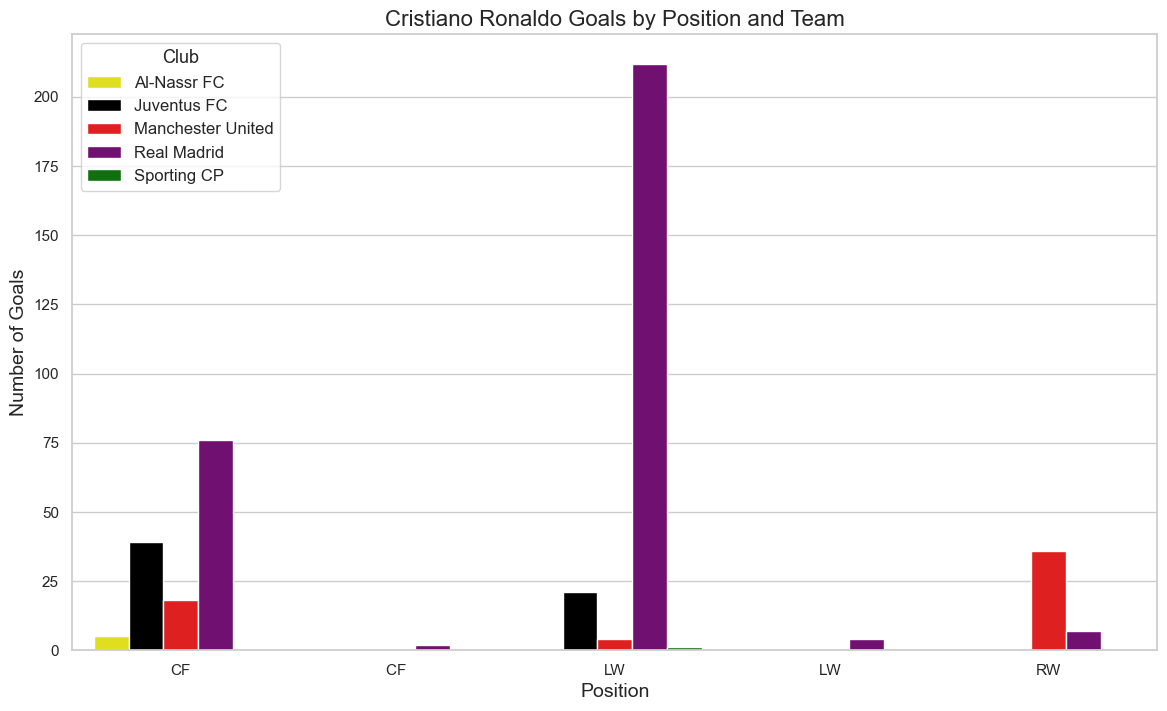

In [96]:
goals_per_position_team = df.groupby(['Playing_Position', 'Club']).size().reset_index(name='Goals')

# Define colors for each team
team_colors = {
    'Sporting CP': 'green',
    'Manchester United': 'red',
    'Real Madrid': 'purple',
    'Juventus FC': 'black',
    'Al-Nassr FC':'yellow'
}

# Set the plot size and style
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create the bar plot
sns.barplot(x='Playing_Position', y='Goals', hue='Club', data=goals_per_position_team, palette=team_colors)

# Customize the plot
plt.title('Cristiano Ronaldo Goals by Position and Team', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Number of Goals', fontsize=14)
plt.legend(title='Club', fontsize=12, title_fontsize='13')
plt.show()

In [97]:
px.histogram(
    df,
    x='Playing_Position',
    title="Goals per playing Position",
    log_x=False,
    log_y=False,
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Playing_Position','Season','Club']
)

In [98]:
fig = px.histogram(
    df,
    x='Competition',
    title="Goals per competition",
    log_x=False,
    log_y=False,
    height=500,
    color='Club',
    #hover_name='Club',
    hover_data=['Competition', 'Club']
)
fig.show()

In [99]:
fig=px.histogram(
    df,
    x='Goal_assist',
    title="Goal per assisters",
    log_x=False,
    log_y=False,
    height=500,
    color='Club',
    hover_data=['Competition','Club']
)
fig.show()

In [100]:
fig=px.histogram(
    df,
    x='Opponent',
    title="Goal vs opponents",
    log_x=False,
    log_y=False,
    height=500,
    color='Club',
    hover_data=['Competition','Club']
)
fig.show()

In [101]:
fig=px.histogram(
    df,
    x='Type',
    title="Type of Goals",
    log_x=False,
    log_y=False,
    height=500,
    color='Club',
    hover_data=['Competition','Club']
)
fig.show()

In [107]:
mins=list(map(str, range(1,121)))
mins.insert(45,"1stE")
mins.insert(91,"2ndE")
mins.insert(122,"ExtE")
df.loc[df.Minute.str[:3]=='45+', 'Minute'] = '1stE'
df.loc[df.Minute.str[:3]=='90+', 'Minute'] = '2ndE'
df.loc[df.Minute.str[:4]=='120+', 'Minute'] = 'ExtE'
mins1=mins[:23]
mins2=mins[23:46]
mins3=mins[46:69]
mins4=mins[69:92]
mins5=mins[92:]



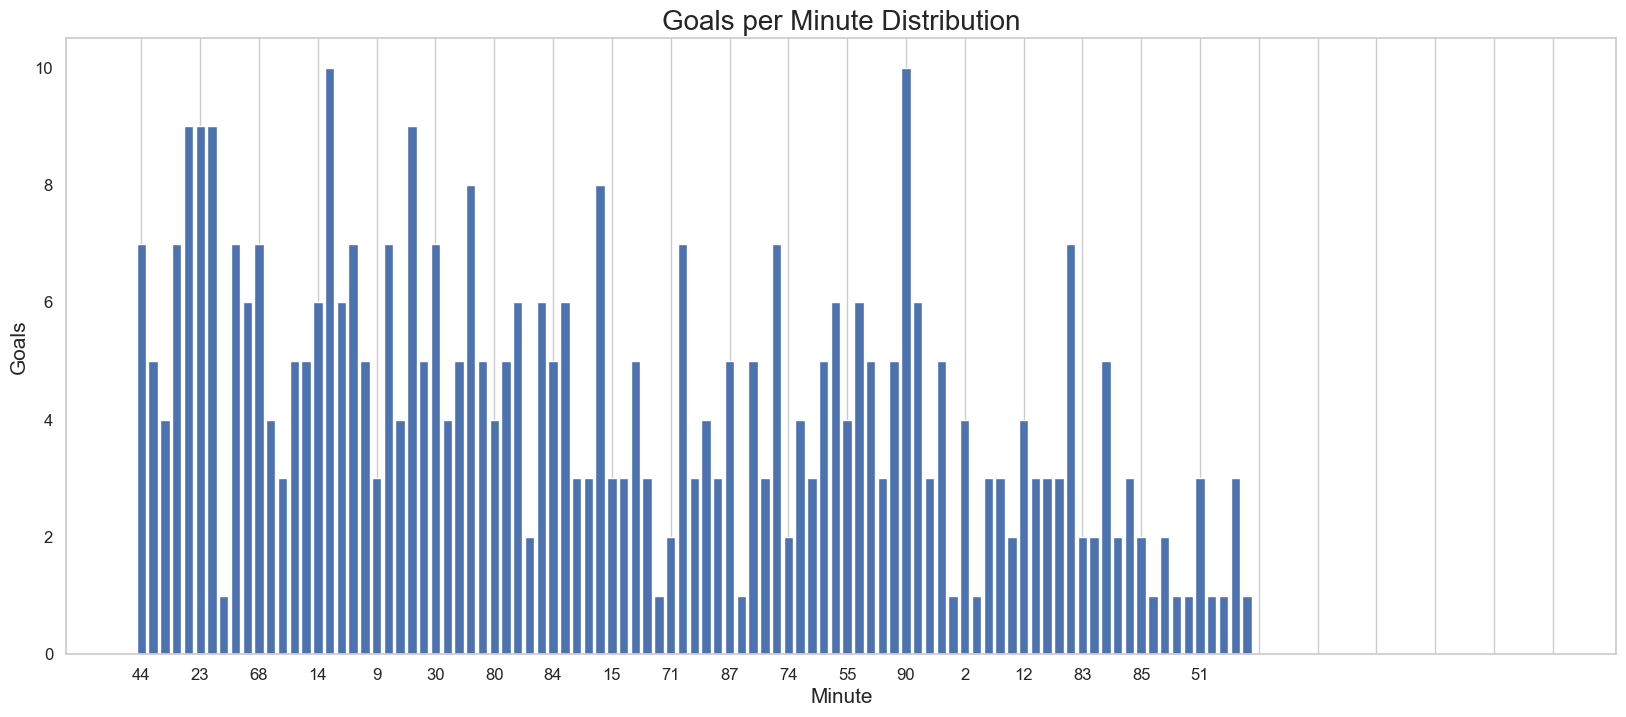

In [108]:
plt.figure(figsize=(20, 8))
plt.hist(df['Minute'], bins=range(1, 122), align='left', rwidth=0.8)

# Customize the plot
plt.title('Goals per Minute Distribution', fontsize=20)
plt.xlabel('Minute', fontsize=15)
plt.ylabel('Goals', fontsize=15)
plt.xticks(range(1, 122, 5), fontsize=12)  # Adjust x-axis ticks for every 5 minutes
plt.yticks(fontsize=12)
plt.grid(axis='y')  # Add grid lines to y-axis

plt.show()


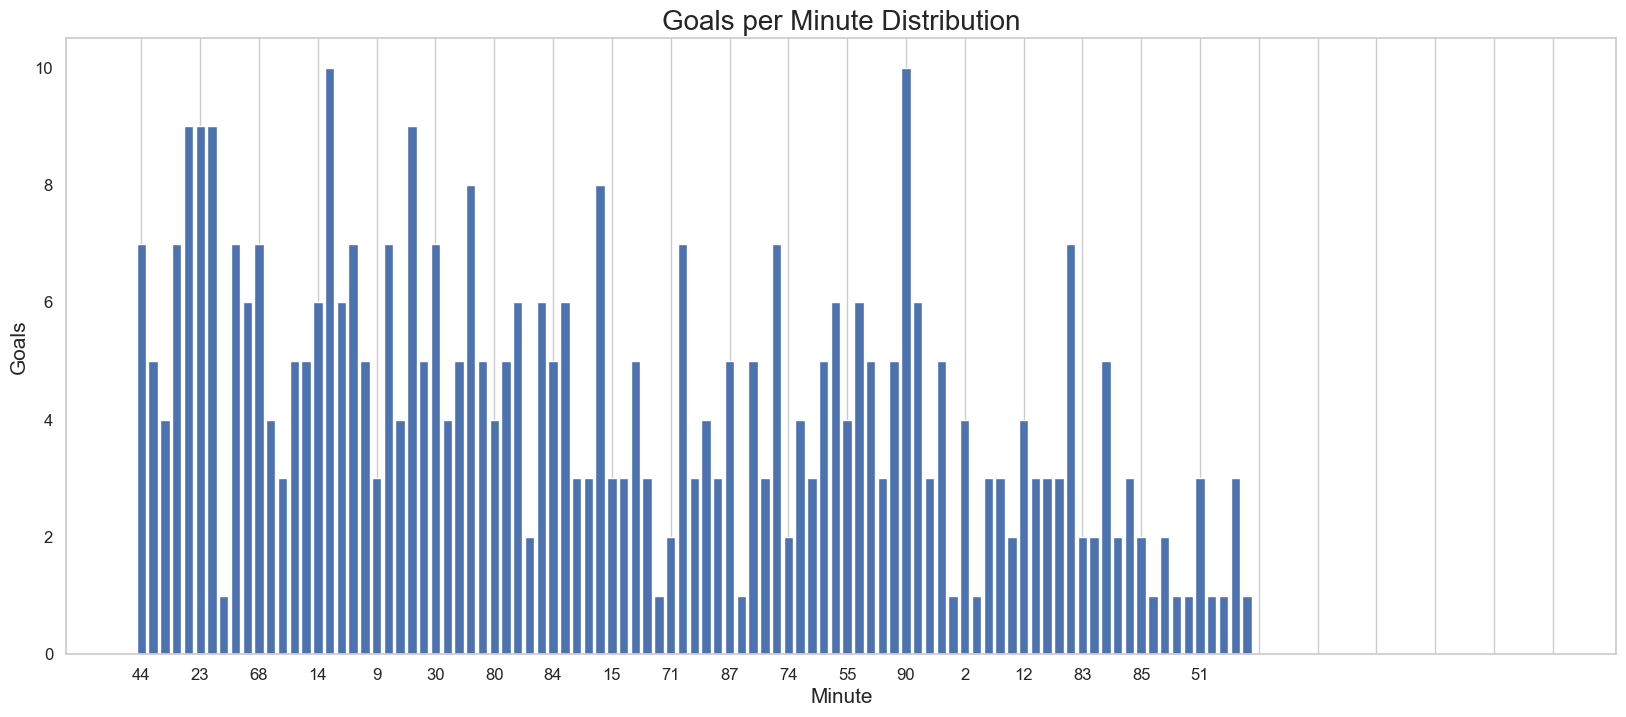

In [109]:
plt.figure(figsize=(20, 8))
plt.hist(df['Minute'], bins=range(1, 122), align='left', rwidth=0.8)

# Customize the plot
plt.title('Goals per Minute Distribution', fontsize=20)
plt.xlabel('Minute', fontsize=15)
plt.ylabel('Goals', fontsize=15)
plt.xticks(range(1, 122, 5), fontsize=12)  # Adjust x-axis ticks for every 5 minutes
plt.yticks(fontsize=12)
plt.grid(axis='y')  # Add grid lines to y-axis

plt.show()

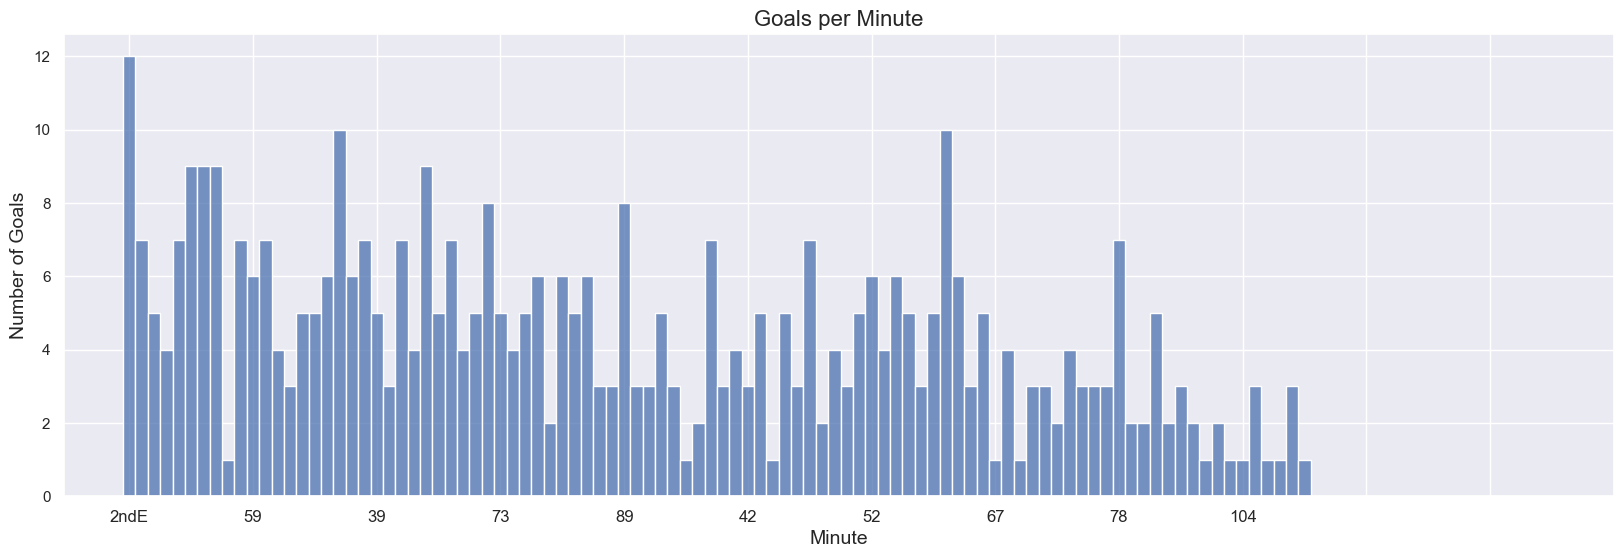

In [122]:
plt.figure(figsize=(20, 6))

# Plot histogram
sns.histplot(df['Minute'], bins=range(1, 122), kde=False)

# Set labels and title
plt.title('Goals per Minute', fontsize=16)
plt.xlabel('Minute', fontsize=14)
plt.ylabel('Number of Goals', fontsize=14)

# Set x-axis ticks to show every 10th minute for better readability
plt.xticks(range(0, 121, 10), fontsize=12)

# Show plot
plt.show()